# Exploratory Analysis and Modeling

# Exploratory analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# get data (5 fixtures avg. performance + next fixture actual points)
last_5_df = pd.read_csv('data/last_5_gw14-19.csv')

## Midfield Players

Let's look at correlation between the variables. First we'll filter to midfield players who averaged at least 45 minutes per game over 5 games (made 5 appearances). 

In [3]:
# filter mids who play at least 45 min. per game
mid_filter = last_5_df[(last_5_df['position'] == 'MID') &
                       (last_5_df['mean_minutes'] >= 45)]
mid_filter

,Unnamed: 0,name,id,team,position,mean_points,mean_minutes,mean_goals_scored,mean_assists,mean_clean_sheets,...,mean_creativity,mean_threat,mean_ict,mean_xg,mean_xa,mean_xgi,mean_xgc,mean_opp_att,mean_opp_def,latest_points
236,0,Granit Xhaka,3,Arsenal,MID,2.8,71.8,0.0,0.2,0.4,...,15.08,12.2,4.12,0.03624,0.077746,0.113986,0.57878,1134.0,1132.0,2
238,0,Thomas Partey,6,Arsenal,MID,3.4,86.6,0.2,0.0,0.6,...,12.94,13.2,4.36,0.14324,0.076232,0.219472,0.63094,1134.0,1132.0,3
239,0,Martin Ødegaard,7,Arsenal,MID,10.6,88.4,0.8,0.6,0.6,...,43.00,40.4,12.88,0.44374,0.365186,0.808926,0.69526,1134.0,1132.0,2
242,0,Bukayo Saka,13,Arsenal,MID,5.4,77.2,0.4,0.4,0.4,...,39.24,14.0,8.26,0.25732,0.168212,0.425532,0.64568,1134.0,1132.0,3
244,0,Gabriel Martinelli Silva,19,Arsenal,MID,7.0,83.8,0.6,0.4,0.6,...,10.08,40.4,7.62,0.24616,0.086052,0.332212,0.70508,1134.0,1132.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,0,Rúben da Silva Neves,480,Wolves,MID,4.2,90.0,0.4,0.0,0.0,...,12.36,18.6,5.62,0.23550,0.015738,0.251238,1.76236,1154.0,1180.0,2
519,0,Daniel Castelo Podence,483,Wolves,MID,2.8,61.8,0.2,0.2,0.0,...,15.56,31.4,6.26,0.14864,0.051886,0.200526,1.09206,1154.0,1180.0,7
523,0,Adama Traoré Diarra,491,Wolves,MID,1.4,53.8,0.0,0.0,0.0,...,8.70,6.8,2.06,0.02010,0.073720,0.093820,1.08914,1154.0,1180.0,1
524,0,João Filipe Iria Santos Moutinho,503,Wolves,MID,2.6,71.0,0.0,0.2,0.2,...,10.98,5.6,2.46,0.02482,0.074754,0.099574,1.42642,1154.0,1180.0,4


In [4]:
# correlation with latest points
mid_filter.corrwith(mid_filter['latest_points']).dropna().sort_values()

mean_opp_def          -0.246296
mean_opp_att          -0.153195
mean_own_goals        -0.021258
mean_clean_sheets     -0.001618
id                     0.040472
mean_xg                0.133568
mean_bonus             0.135084
mean_goals_conceded    0.159250
mean_xgc               0.160195
mean_goals_scored      0.161624
mean_assists           0.175001
mean_points            0.189333
mean_xgi               0.242375
mean_bps               0.251958
mean_minutes           0.254482
mean_creativity        0.264233
mean_influence         0.276696
mean_xa                0.296704
mean_threat            0.301278
mean_ict               0.347494
latest_points          1.000000
dtype: float64

For this data, minutes, ICT, expected assists, and opposition defensive strength (negative) seem to have the highest correlation with latest points. However, the correlation bewtween all variables and latest points is low.

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'mean_points'}>,
        <AxesSubplot:title={'center':'mean_minutes'}>,
        <AxesSubplot:title={'center':'mean_goals_scored'}>],
       [<AxesSubplot:title={'center':'mean_assists'}>,
        <AxesSubplot:title={'center':'mean_clean_sheets'}>,
        <AxesSubplot:title={'center':'mean_goals_conceded'}>,
        <AxesSubplot:title={'center':'mean_own_goals'}>,
        <AxesSubplot:title={'center':'mean_saves'}>],
       [<AxesSubplot:title={'center':'mean_bonus'}>,
        <AxesSubplot:title={'center':'mean_bps'}>,
        <AxesSubplot:title={'center':'mean_influence'}>,
        <AxesSubplot:title={'center':'mean_creativity'}>,
        <AxesSubplot:title={'center':'mean_threat'}>],
       [<AxesSubplot:title={'center':'mean_ict'}>,
        <AxesSubplot:title={'center':'mean_xg'}>,
        <AxesSubplot:title={'center':'mean_xa'}>,
        <AxesSubplo

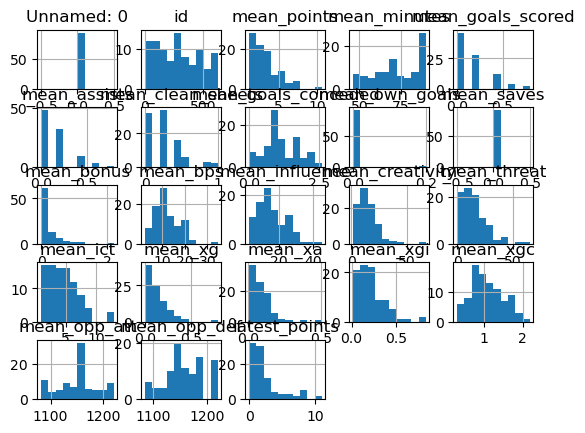

In [5]:
mid_filter.hist()

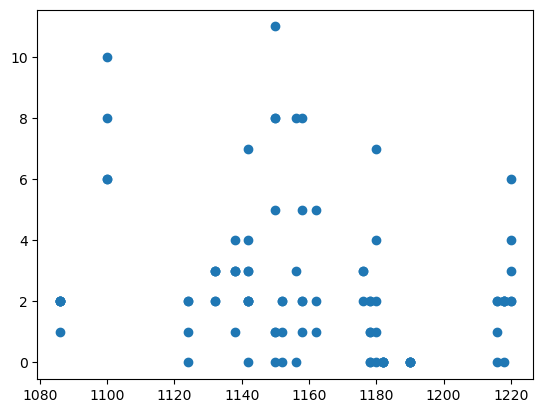

In [6]:
plt.scatter('mean_opp_def', 'latest_points', data = mid_filter)

## Forward Players

Let's look at correlation between the variables. First we'll filter to forwards who averaged at least 45 minutes per game over 5 games (made 5 appearances). 

In [7]:
# filter fwds who play at least 45 min. per game
fwd_filter = last_5_df[(last_5_df['position'] == 'FWD') &
                       (last_5_df['mean_points'] >= 1)]
fwd_filter.head()

,Unnamed: 0,name,id,team,position,mean_points,mean_minutes,mean_goals_scored,mean_assists,mean_clean_sheets,...,mean_creativity,mean_threat,mean_ict,mean_xg,mean_xa,mean_xgi,mean_xgc,mean_opp_att,mean_opp_def,latest_points
532,0,Eddie Nketiah,11,Arsenal,FWD,3.0,39.0,0.4,0.0,0.0,...,3.28,20.0,3.68,0.23434,0.015410,0.249750,0.45160,1134.0,1132.0,1
533,0,Gabriel Fernando de Jesus,28,Arsenal,FWD,2.6,54.0,0.0,0.4,0.6,...,15.72,42.4,7.30,0.31360,0.150462,0.464062,0.28044,1134.0,1132.0,0
535,0,Danny Ings,30,Aston Villa,FWD,3.6,39.0,0.4,0.0,0.0,...,5.06,14.0,3.58,0.21700,0.014912,0.231912,0.77050,1194.0,1218.0,8
536,0,Ollie Watkins,40,Aston Villa,FWD,3.4,69.4,0.2,0.4,0.2,...,13.88,29.6,6.10,0.18156,0.059166,0.240726,1.42752,1194.0,1218.0,2
539,0,Kieffer Moore,62,Bournemouth,FWD,5.0,84.0,0.6,0.0,0.2,...,3.70,24.6,5.48,0.41456,0.027858,0.442418,1.61450,1148.0,1152.0,1


In [8]:
# correlation with latest points
fwd_filter.corrwith(fwd_filter['latest_points']).dropna().sort_values()

mean_clean_sheets     -0.262948
mean_threat           -0.094521
mean_assists          -0.066527
mean_xg               -0.056529
mean_xgi              -0.018276
mean_ict               0.003554
mean_bonus             0.055825
mean_influence         0.064481
mean_points            0.079040
mean_goals_scored      0.113996
mean_bps               0.116246
id                     0.124834
mean_creativity        0.134448
mean_xa                0.137035
mean_opp_def           0.150307
mean_xgc               0.152171
mean_opp_att           0.177888
mean_minutes           0.191714
mean_goals_conceded    0.328376
latest_points          1.000000
dtype: float64

It is interesting that the greatest correlation with latest points for forwards is with goals conceded and clean sheets (negative). Since forwards get points almost exclusively from goals and assists, I would have expected attacking stats to correlate most strongly with points. Perhaps this shows that forwards playing for more defense-minded teams have lower outputs.

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'mean_points'}>,
        <AxesSubplot:title={'center':'mean_minutes'}>,
        <AxesSubplot:title={'center':'mean_goals_scored'}>],
       [<AxesSubplot:title={'center':'mean_assists'}>,
        <AxesSubplot:title={'center':'mean_clean_sheets'}>,
        <AxesSubplot:title={'center':'mean_goals_conceded'}>,
        <AxesSubplot:title={'center':'mean_own_goals'}>,
        <AxesSubplot:title={'center':'mean_saves'}>],
       [<AxesSubplot:title={'center':'mean_bonus'}>,
        <AxesSubplot:title={'center':'mean_bps'}>,
        <AxesSubplot:title={'center':'mean_influence'}>,
        <AxesSubplot:title={'center':'mean_creativity'}>,
        <AxesSubplot:title={'center':'mean_threat'}>],
       [<AxesSubplot:title={'center':'mean_ict'}>,
        <AxesSubplot:title={'center':'mean_xg'}>,
        <AxesSubplot:title={'center':'mean_xa'}>,
        <AxesSubplo

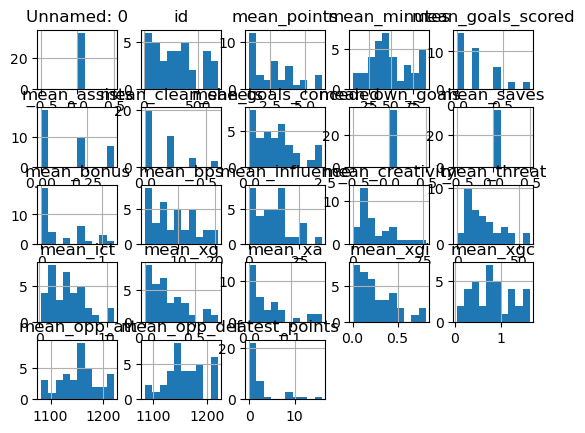

In [9]:
fwd_filter.hist()

## Defenders

Doing the same as above with defenders. For defenders we will filter to those who play at least 60 minutes per game (as required to get clean sheet points).

In [10]:
# filter def who play at least 60 min. per game
def_filter = last_5_df[(last_5_df['position'] == 'DEF') &
                       (last_5_df['mean_minutes'] >= 60)]
def_filter.head()

,Unnamed: 0,name,id,team,position,mean_points,mean_minutes,mean_goals_scored,mean_assists,mean_clean_sheets,...,mean_creativity,mean_threat,mean_ict,mean_xg,mean_xa,mean_xgi,mean_xgc,mean_opp_att,mean_opp_def,latest_points
3,0,Benjamin White,10,Arsenal,DEF,4.4,83.8,0.0,0.0,0.6,...,16.18,3.6,3.34,0.05678,0.120242,0.177022,0.56658,1134.0,1132.0,7
5,0,Gabriel dos Santos Magalhães,16,Arsenal,DEF,5.6,90.0,0.2,0.0,0.6,...,2.06,13.6,3.58,0.26316,0.018624,0.281784,0.72334,1134.0,1132.0,6
8,0,William Saliba,26,Arsenal,DEF,4.8,87.0,0.0,0.0,0.6,...,3.84,8.2,2.82,0.10866,0.009726,0.118386,0.71464,1134.0,1132.0,7
12,0,Lucas Digne,33,Aston Villa,DEF,4.2,72.0,0.2,0.0,0.2,...,18.20,6.8,4.50,0.01896,0.087294,0.106254,0.97624,1194.0,1218.0,2
14,0,Tyrone Mings,39,Aston Villa,DEF,1.6,90.0,0.0,0.0,0.2,...,0.38,0.8,1.56,0.00000,0.005048,0.005048,1.55872,1194.0,1218.0,7


In [11]:
# correlation with latest points
def_filter.corrwith(def_filter['latest_points']).dropna().sort_values()

mean_xgc              -0.418963
mean_opp_att          -0.343484
mean_opp_def          -0.264488
mean_goals_conceded   -0.228725
mean_goals_scored     -0.068347
mean_own_goals        -0.046508
mean_influence        -0.007553
id                     0.052909
mean_threat            0.066726
mean_assists           0.167950
mean_minutes           0.183759
mean_ict               0.221986
mean_xa                0.293483
mean_creativity        0.294172
mean_xg                0.301077
mean_bonus             0.383047
mean_points            0.406402
mean_clean_sheets      0.407126
mean_xgi               0.415284
mean_bps               0.415494
latest_points          1.000000
dtype: float64

For defenders, past points have a stronger correlation with latest points (compared to forwards and midfielders). This suggests that defenders produce more consistent points. It is expected that xgc and goals conceded have a negative correlation with points scored by defenders, since conceding goals robs defenders of most of their points. 

# Predicting next fixture points using regression
Trying linear regression for better speed vs. KNN regression

In [12]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

import numpy as np

In [13]:
#import data
data = pd.read_csv("data/last_5_gw14-19.csv")

## Midfield Players

In [14]:
#filter midfielders
mid_data = data[(data['position'] == 'MID') &
                    (data['mean_minutes'] >= 45)]

# split the data for training and testing using 60:40 split
mid_train, mid_test = train_test_split(
    mid_data, train_size=0.6, random_state=1234
)

we will use all predictors for midfield players

In [22]:
lm = linear_model.LinearRegression()

#X_train = mid_train[["mean_minutes", "mean_ict", "mean_xa", "mean_opp_def", "mean_xgi"]]
X_train = mid_train.drop(['name', 'team', 'id', 'position', 'latest_points'], axis = 1)
y_train = mid_train[["latest_points"]]

# fit the linear regression model
lm.fit(X_train, y_train)

LinearRegression()

In [23]:
X_test = mid_test.drop(['name', 'team', 'id', 'position', 'latest_points'], axis = 1)
y_test = mid_test[["latest_points"]]

# predict on test data
mid_preds = mid_test
mid_preds = mid_preds.assign(predicted=lm.predict(X_test))

# calculate RMSPE
RMSPE = np.sqrt(
    mean_squared_error(y_true=mid_preds["latest_points"], y_pred=mid_preds["predicted"])
)

RMSPE


2.388188423609469

Since RMSPE is in units of the response variable "latest_points", the prediction appears to be accurate to within ~2 points. This is a decent prediction, considering the variability associated with football player performance. As midfielders get most of their FPL points from goals and assists and football is a relatively low scoring game, it is expected that it is hard to accurately predict whether any individual player will score points.

In [24]:
# show the highest predicted points
mid_preds.sort_values('predicted', ascending=False).head(10)

,Unnamed: 0,name,id,team,position,mean_points,mean_minutes,mean_goals_scored,mean_assists,mean_clean_sheets,...,mean_threat,mean_ict,mean_xg,mean_xa,mean_xgi,mean_xgc,mean_opp_att,mean_opp_def,latest_points,predicted
422,0,Kevin De Bruyne,301,Man City,MID,4.6,90.0,0.2,0.2,0.2,...,29.2,12.34,0.14628,0.503916,0.650196,0.72290,1084.0,1138.0,3,5.715700
296,0,Leandro Trossard,111,Brighton,MID,3.4,79.6,0.2,0.2,0.0,...,40.4,7.20,0.32928,0.125914,0.455194,1.67372,1162.0,1150.0,0,4.945108
400,0,Brenden Aaronson,246,Leeds,MID,2.8,87.4,0.0,0.2,0.2,...,18.4,4.30,0.11406,0.038822,0.152882,2.18852,1220.0,1220.0,2,4.756301
334,0,Michael Olise,171,Crystal Palace,MID,5.8,87.0,0.2,0.4,0.4,...,21.8,7.06,0.08976,0.103730,0.193490,1.11180,1082.0,1086.0,2,4.710942
434,0,Bruno Borges Fernandes,333,Man Utd,MID,3.4,72.0,0.0,0.4,0.6,...,24.8,7.38,0.10792,0.269422,0.377342,0.74106,1102.0,1100.0,6,4.478278
410,0,Mohamed Salah,283,Liverpool,MID,7.6,90.0,0.8,0.2,0.0,...,65.0,11.82,0.79440,0.046024,0.840424,1.25672,1124.0,1124.0,2,4.320877
294,0,Pascal Groß,104,Brighton,MID,5.0,90.0,0.4,0.2,0.0,...,12.6,5.48,0.09810,0.129598,0.227698,1.77338,1162.0,1150.0,8,4.033130
435,0,Marcus Rashford,335,Man Utd,MID,6.2,80.0,0.6,0.2,0.4,...,52.4,9.14,0.33832,0.134272,0.472592,0.81224,1102.0,1100.0,8,3.480937
244,0,Gabriel Martinelli Silva,19,Arsenal,MID,7.0,83.8,0.6,0.4,0.6,...,40.4,7.62,0.24616,0.086052,0.332212,0.70508,1134.0,1132.0,3,2.996937
329,0,Wilfried Zaha,160,Crystal Palace,MID,3.8,90.0,0.2,0.2,0.4,...,26.0,5.86,0.27402,0.100374,0.374394,1.17592,1082.0,1086.0,2,2.935161


## Forward Players

In [25]:
#filter forwards
fwd_data = data[(data['position'] == 'FWD') &
                    (data['mean_minutes'] >= 45)]

# split the data for training and testing using 60:40 split
fwd_train, fwd_test = train_test_split(
    fwd_data, train_size=0.6, random_state=1234
)

In [26]:
lm = linear_model.LinearRegression()
X_train_fwd = fwd_train[["mean_minutes", "mean_clean_sheets", "mean_goals_conceded"]]
y_train_fwd = fwd_train[["latest_points"]]

# fit the linear regression model
lm.fit(X_train_fwd, y_train_fwd)

LinearRegression()

In [27]:
X_test_fwd = fwd_test[["mean_minutes", "mean_clean_sheets", "mean_goals_conceded"]]
y_test_fwd = fwd_test[["latest_points"]]

# predict on test data
fwd_preds = fwd_test
fwd_preds = fwd_preds.assign(predicted=lm.predict(X_test_fwd))

# calculate RMSPE
RMSPE = np.sqrt(
    mean_squared_error(y_true=fwd_preds["latest_points"], y_pred=fwd_preds["predicted"])
)

RMSPE

4.418278769834906

In [28]:
# show the highest predicted points
fwd_preds.sort_values('predicted', ascending=False).head(10)

,Unnamed: 0,name,id,team,position,mean_points,mean_minutes,mean_goals_scored,mean_assists,mean_clean_sheets,...,mean_threat,mean_ict,mean_xg,mean_xa,mean_xgi,mean_xgc,mean_opp_att,mean_opp_def,latest_points,predicted
539,0,Kieffer Moore,62,Bournemouth,FWD,5.0,84.0,0.6,0.0,0.2,...,24.6,5.48,0.41456,0.027858,0.442418,1.61450,1148.0,1152.0,1,7.028230
574,0,Sam Greenwood,237,Leeds,FWD,2.8,34.2,0.2,0.4,0.0,...,9.4,4.68,0.07594,0.083406,0.159346,1.01206,1220.0,1220.0,1,6.416623
614,0,Matheus Santos Carneiro Da Cunha,682,Wolves,FWD,1.0,24.0,0.0,0.0,0.0,...,8.0,1.80,0.11620,0.000390,0.116590,1.47820,1110.0,1090.0,1,6.332622
596,0,Emmanuel Dennis,585,Nott'm Forest,FWD,1.4,27.8,0.0,0.2,0.0,...,11.0,2.34,0.06528,0.018952,0.084232,0.66154,1172.0,1176.0,0,5.962219
536,0,Ollie Watkins,40,Aston Villa,FWD,3.4,69.4,0.2,0.4,0.2,...,29.6,6.10,0.18156,0.059166,0.240726,1.42752,1194.0,1218.0,2,5.216635
535,0,Danny Ings,30,Aston Villa,FWD,3.6,39.0,0.4,0.0,0.0,...,14.0,3.58,0.21700,0.014912,0.231912,0.77050,1194.0,1218.0,8,4.870504
560,0,Neal Maupay,110,Everton,FWD,1.2,41.6,0.0,0.0,0.0,...,17.0,2.24,0.09016,0.002726,0.092886,0.96476,1152.0,1142.0,1,4.617070
548,0,Julio Enciso,125,Brighton,FWD,1.0,18.4,0.0,0.2,0.0,...,10.2,1.20,0.06994,0.007104,0.077044,0.34632,1162.0,1150.0,1,3.643756
532,0,Eddie Nketiah,11,Arsenal,FWD,3.0,39.0,0.4,0.0,0.0,...,20.0,3.68,0.23434,0.015410,0.249750,0.45160,1134.0,1132.0,1,2.714022
543,0,Bryan Mbeumo,95,Brentford,FWD,2.6,74.8,0.2,0.2,0.0,...,19.0,5.76,0.28096,0.174798,0.455758,0.87362,1170.0,1162.0,12,1.380915


## Defenders

In [29]:
#filter forwards
def_data = data[(data['position'] == 'DEF') &
                (data['mean_minutes'] >= 60)]

# split the data for training and testing using 60:40 split
def_train, def_test = train_test_split(
    def_data, train_size=0.6, random_state=1234
)

In [35]:
lm = linear_model.LinearRegression()

X_train_def = def_train[["mean_xgc", "mean_opp_att",
                         "mean_goals_conceded", "mean_xgi", "mean_bps",
                        "mean_clean_sheets", "mean_points"]]
y_train_def = def_train[["latest_points"]]

# fit the linear regression model
lm.fit(X_train_def, y_train_def)

LinearRegression()

In [36]:
X_test_def = def_test[["mean_xgc", "mean_opp_att",
                         "mean_goals_conceded", "mean_xgi", "mean_bps",
                        "mean_clean_sheets", "mean_points"]]
y_test_def = def_test[["latest_points"]]

# predict on test data
def_preds = def_test
def_preds = def_preds.assign(predicted=lm.predict(X_test_def))

# calculate RMSPE
RMSPE = np.sqrt(
    mean_squared_error(y_true=def_preds["latest_points"], y_pred=def_preds["predicted"])
)

RMSPE

3.097092888910334

In [37]:
# show the highest predicted points
def_preds.sort_values('predicted', ascending=False).head(10)

,Unnamed: 0,name,id,team,position,mean_points,mean_minutes,mean_goals_scored,mean_assists,mean_clean_sheets,...,mean_threat,mean_ict,mean_xg,mean_xa,mean_xgi,mean_xgc,mean_opp_att,mean_opp_def,latest_points,predicted
174,0,Fabian Schär,366,Newcastle,DEF,5.4,88.4,0.0,0.0,0.8,...,10.4,3.08,0.10032,0.045710,0.146030,0.67958,1120.0,1142.0,6,5.961830
177,0,Sven Botman,377,Newcastle,DEF,5.4,85.2,0.0,0.0,0.8,...,4.6,2.06,0.07376,0.005000,0.078760,0.67958,1120.0,1142.0,6,5.056022
155,0,Luke Shaw,332,Man Utd,DEF,5.6,84.8,0.0,0.2,0.6,...,1.4,3.18,0.00424,0.138278,0.142518,0.90068,1102.0,1100.0,15,4.907326
142,0,John Stones,302,Man City,DEF,2.8,90.0,0.0,0.0,0.2,...,12.0,3.52,0.06954,0.040236,0.109776,0.72290,1084.0,1138.0,9,3.910813
100,0,Kenny Tete,215,Fulham,DEF,3.2,72.0,0.0,0.2,0.4,...,6.4,4.14,0.04158,0.125928,0.167508,0.99162,1158.0,1190.0,0,3.898944
75,0,Joachim Andersen,165,Crystal Palace,DEF,3.2,90.0,0.0,0.0,0.4,...,5.8,2.74,0.04520,0.017506,0.062706,1.17592,1082.0,1086.0,0,3.475215
205,0,Ben Davies,432,Spurs,DEF,3.2,72.2,0.4,0.0,0.0,...,9.6,3.86,0.07364,0.058748,0.132388,0.76428,1138.0,1156.0,1,3.440613
76,0,Marc Guéhi,167,Crystal Palace,DEF,3.0,72.0,0.0,0.0,0.4,...,3.8,1.74,0.01464,0.008618,0.023258,0.65476,1082.0,1086.0,0,3.433691
29,0,Jordan Zemura,76,Bournemouth,DEF,1.8,67.8,0.0,0.0,0.2,...,3.6,2.60,0.00000,0.052364,0.052364,1.10670,1148.0,1152.0,0,3.047979
111,0,Timothy Castagne,258,Leicester,DEF,3.2,90.0,0.0,0.0,0.4,...,11.6,4.66,0.12164,0.040652,0.162292,1.53886,1208.0,1216.0,1,2.993408


## Model Considerations and Improvements

- Data analyzed from one single 6-week span so far. Perhaps we can reduce noise if data is collected across the whole season or multiple season. This would involve collecting data for each gameweek and the 5 preceeding gameweeks and appending it to the data as was done in this program.
- The predictor doesn't currently consider opposition strength for the next fixture. I expect that players playing stronger teams are likely to return fewer points, especially those players who play for weaker teams. 
- This predictor attempts to analyze player form over 5 consecutive fixtures, assuming that they will maintain that form. Despite being elite athletes, football players are human and can go through periods of good and bad form. 
- Predicting points for forwards doesn't seem to be straighforward with this dataset/model. Perhaps this can be improved by collecting data over a longer time-span.